# Analyze Sort-seq
Sort-seq library question 6: Do half sites increase expression at weak singlton promoter?

This module analyzes the sort-serw data and made figure 5D and Figure9S

In [3]:
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy 
import itertools
import seaborn as sns
import statannotations
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statannotations.Annotator import Annotator
from scipy import stats
from analyze_sig_hits_v2 import *
from analyze_sort_seq import *
from bioinfokit.analys import stat

In [4]:
def make_sns_boxplot(df, xvalue, yvalue, color, hue_value, xl, yl, output):
    """This function makes a boxplot for singlton mutant sequences """
    ax = sns.boxplot(x=xvalue, y=yvalue, data=df, hue = hue_value, palette= color)
    yt = ["Mutcan", "Mutcan+CGG", 'Mutcan+CG']
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    ax.set_xticklabels(yt)
    plt.show()
    #plt.savefig(output, bbox_inches='tight')

In [5]:
def singlton_df(df):
    """ This function makes a df of singlton promoter sequences"""
    
    return df.loc[df['Sequence_type'].str.contains("singlton") ]
    
    


In [6]:
def anova_table(df, outputfile):
    """ This function performs an anova analysis """
    model = ols('Expression ~ C(Sequence_type) + C(Promoter) + C(Sequence_type):C(Promoter)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_table.to_csv(outputfile)
def tukey_table(df, output_file):
    """ This function performs a tukey test"""
    res = stat()
    res2 = stat()
    res3 = stat()
    res.tukey_hsd(df=df, res_var='Expression', xfac_var='Sequence_type', anova_model='Expression~C(Sequence_type)+C(Promoter)+C(Sequence_type):C(Promoter)')
    res2.tukey_hsd(df=df, res_var='Expression', xfac_var='Promoter', anova_model='Expression ~ C(Sequence_type) + C(Promoter) + C(Sequence_type):C(Promoter)')
    res3.tukey_hsd(df=df, res_var='Expression', xfac_var=['Sequence_type','Promoter'], anova_model='Expression ~ C(Sequence_type) + C(Promoter) + C(Sequence_type):C(Promoter)')
    res3.tukey_summary.to_csv("Tukey" + output_file)
    res.tukey_summary.to_csv("Tukey_sequence" + output_file)
    return res.tukey_summary

In [7]:
expression_file = "L4_gal4_anova_analysis.csv"
expression_ko_file = "L4_gal4KO_anova_analysis.csv"

expression_file2 = "L4_leu3_anova.csv"
expression_file3 = "L4_lys14_anova.csv"
expression_file4 = "L4_yrm1_final.csv"




df = pd.read_csv(expression_file4, header= None)
#df_ko = pd.read_csv(expression_ko_file, header= None)
df.columns = ['Sequence_type', 'Promoter', 'insert', 'Expression']
#df_ko.columns = ['Sequence_type', 'Promoter', 'insert', 'Expression']

In [8]:
singlton_df(df)

,Sequence_type,Promoter,insert,Expression
460,WT_singlton,Nrt1_Sgo1pr,9,3663.218
461,WT_singlton,Gip3_Isu1pr,12,4464.806
462,WT_singlton,Spo24pr,17,5745.747
463,WT_singlton,Nrt1_Sgo1pr_mut_canon,8,3287.749
464,WT_singlton,Gip3_Isu1pr_mut_canon,11,3345.140
465,WT_singlton,Spo24pr_mut_canon,16,4904.706
466,singlton,Nrt1_Sgo1pr,1,2626.807
467,singlton,Gip3_Isu1pr,1,1403.131
468,singlton,Spo24pr,1,2789.331
469,singlton,Nrt1_Sgo1pr_mut_canon,0,1454.778


In [9]:
wt_singlton_df = singlton_df(df)
#singlton_df_ko = singlton_df(df_ko)

In [10]:

sequence_type_list = []
for index, row in wt_singlton_df.iterrows():
    if 'mut' in row['Promoter']:
        sequence_type_list.append(row["Sequence_type"] + "_mutcan")
    else:
        sequence_type_list.append(row["Sequence_type"])
        

In [11]:
wt_singlton_df["Sequence_type"] = sequence_type_list

/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
wt_singlton_df['Promoter'] = wt_singlton_df['Promoter'].str.replace('_mut_canon',"")
wt_singlton_df['Promoter'] = wt_singlton_df['Promoter'].str.replace('_mut_can',"")


/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
wt_singlton_df

,Sequence_type,Promoter,insert,Expression
460,WT_singlton,Nrt1_Sgo1pr,9,3663.218
461,WT_singlton,Gip3_Isu1pr,12,4464.806
462,WT_singlton,Spo24pr,17,5745.747
463,WT_singlton_mutcan,Nrt1_Sgo1pr,8,3287.749
464,WT_singlton_mutcan,Gip3_Isu1pr,11,3345.140
465,WT_singlton_mutcan,Spo24pr,16,4904.706
466,singlton,Nrt1_Sgo1pr,1,2626.807
467,singlton,Gip3_Isu1pr,1,1403.131
468,singlton,Spo24pr,1,2789.331
469,singlton_mutcan,Nrt1_Sgo1pr,0,1454.778


In [14]:
wt_singlton_df['Sequence_type'] = wt_singlton_df['Sequence_type'].str.replace('WT_singlton_mutcan',"Mutcan")
wt_singlton_df['Sequence_type'] = wt_singlton_df['Sequence_type'].str.replace('singlton_mutcan',"Mutcan+CGG")
wt_singlton_df['Sequence_type'] = wt_singlton_df['Sequence_type'].str.replace('singlton_CG_control_mutcan',"Mutcan+CG_control")


/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [18]:
#wt_singlton_df = wt_singlton_df.drop(labels= ['WT_singlton','singlton', 'singlton_CG_control'], axis = 0)

wt_singlton_df = wt_singlton_df[~wt_singlton_df["Sequence_type"].str.contains("singlton")]

In [31]:

anova_table(wt_singlton_df, "q6_yrm1_anova.csv")

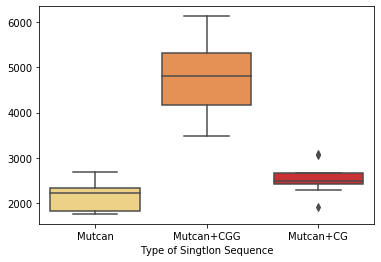

In [115]:
make_sns_boxplot(wt_singlton_df, 'Sequence_type', 'Expression', 'YlOrRd', None, "Type of Singtlon Sequence", '', 'q6_leu3_combined.pdf')
# ax = sns.barplot(x='Sequence_type', y='Expression', data=singlton_df, hue = 'Promoter', palette= 'OrRd')

# ax.set_xticks(x_locs)
# ax.set_xticklabels(yt)

In [116]:
pairs = [

         ("Mutcan", "Mutcan+CGG"),
         ("Mutcan", "Mutcan+CG_control"),
        ("Mutcan+CGG", "Mutcan+CG_control"),
         
         
        ]

#sinlgton

In [117]:
anova_table(wt_singlton_df, "q6_anova_leu32.csv")

In [15]:
tukey = tukey_table(wt_singlton_df, "q6_yrm1.csv")

In [16]:
tukey

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,WT_singlton,Mutcan,749.187000,-36.984060,1535.358060,4.054588,0.069425
1,WT_singlton,singlton,2276.355889,1490.184829,3062.526949,12.319600,0.001000
2,WT_singlton,Mutcan+CGG,2646.105667,1859.934606,3432.276727,14.320680,0.001000
3,WT_singlton,singlton_CG_control,1656.489889,870.318829,2442.660949,8.964896,0.001000
4,WT_singlton,Mutcan+CG_control,2141.463444,1355.292384,2927.634505,11.589565,0.001000
5,Mutcan,singlton,1527.168889,740.997829,2313.339949,8.265013,0.001000
6,Mutcan,Mutcan+CGG,1896.918667,1110.747606,2683.089727,10.266092,0.001000
7,Mutcan,singlton_CG_control,907.302889,121.131829,1693.473949,4.910308,0.015834
8,Mutcan,Mutcan+CG_control,1392.276444,606.105384,2178.447505,7.534977,0.001000
9,singlton,Mutcan+CGG,369.749778,-416.421282,1155.920838,2.001080,0.693793


In [120]:
tukey_filtered = tukey.loc[(tukey["group1"] == "WT_singlton") & (tukey["group2"] == "WT_singlton_mutcan")|(tukey["group1"] == "WT_singlton") & (tukey["group2"] == "singlton")| (tukey["group1"] == "WT_singlton") & (tukey["group2"] == "singlton_mutcan")|(tukey["group1"] == "WT_singlton") & (tukey["group2"] == "singlton_CG_control")|(tukey["group1"] == "WT_singlton") & (tukey["group2"] == "singlton_CG_control_mutcan") |(tukey["group1"] == "singlton") & (tukey["group2"] == "singlton_CG_control")|(tukey["group1"] == "singlton") & (tukey["group2"] == "singlton_mutcan")|(tukey["group1"] == "singlton") & (tukey["group2"] == "singlton_CG_control_mutcan")]



tukey_filtered

,group1,group2,Diff,Lower,Upper,q-value,p-value


In [121]:
pvalue = tukey["p-value"].tolist()
pvalue

[0.001, 0.3058949810186492, 0.001]

In [122]:
hue_plot_params = {
    'data': wt_singlton_df,
    'x': 'Sequence_type',
    'y': 'Expression',
    "palette": "YlOrRd"}



p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Mutcan vs. Mutcan+CGG: Custom statistical test, P_val:1.000e-03
Mutcan+CGG vs. Mutcan+CG_control: Custom statistical test, P_val:1.000e-03
Mutcan vs. Mutcan+CG_control: Custom statistical test, P_val:3.059e-01


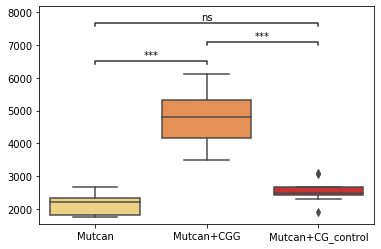

In [123]:
ax = sns.boxplot(x="Sequence_type", y="Expression", data=wt_singlton_df, palette="YlOrRd")
yt = ["Mutcan", "Mutcan+CGG", "Mutcan+CG_control", "WT_CG"]
ax.set_xticklabels(yt)
ax.set_xlabel('')
ax.set_ylabel('')
# #plt.legend(frameon=True, loc=(1.02, 0.8), borderaxespad=0)
annotator = Annotator(ax, pairs, **hue_plot_params)
annotator.set_pvalues(pvalue)
annotator.annotate()
plt.savefig("q6_leu3_combined_box_pval_mutcan.pdf")

In [127]:
wt_singlton_df["difference"] = wt_singlton_df["Expression"] - singlton_df_ko["Expression"]
wt_singlton_df["Sequence_type"] = sequence_type_list
wt_singlton_df['Promoter'] = wt_singlton_df['Promoter'].str.replace('_mut_can', "")

/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

[Text(0, 0, 'WT'),
 Text(0, 0, 'Mutcan'),
 Text(0, 0, 'WT_CGG'),
 Text(0, 0, 'Mutcan_CGG'),
 Text(0, 0, 'WT_CG'),
 Text(0, 0, 'Mutcan_CG')]

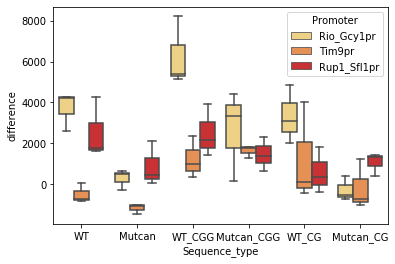

In [130]:
ax = sns.boxplot(x="Sequence_type", y="difference", hue = "Promoter", data= wt_singlton_df, palette="YlOrRd")
yt = ["WT", "Mutcan", "WT_CGG", "Mutcan_CGG", "WT_CG", 'Mutcan_CG']
#plt.legend(frameon=True, loc=(1.02, 0.8), borderaxespad=0)
ax.set_xticklabels(yt)

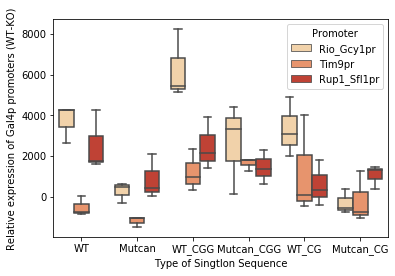

In [136]:
make_sns_boxplot(wt_singlton_df, 'Sequence_type', 'difference', 'OrRd', 'Promoter', "Type of Singtlon Sequence", 'Relative expression of Gal4p promoters (WT-KO)', 'q6_gal4_difference_box.pdf')

